<a href="https://colab.research.google.com/github/ajitpadole/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
import pickle
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [3]:
import pandas as pd
data=pd.read_csv("/content/SeoulBikeData.csv",encoding='latin1')
print(data.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

as we can see there is no any null value by this we can say the dataset is balanced

In [10]:
# Converting the Data column in Datetime Dtype
data['Date']=pd.to_datetime(data['Date'])

In [11]:
# Breaking Down the Date into 3 Components
data['Day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

In [12]:
# find out Categorical features in our dataset
data.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
Day                                   int64
month                                 int64
year                                  int64
dtype: object

# **Univariate** **Analysis**

Text(0.5, 1.0, 'Rented Bike count according to season')

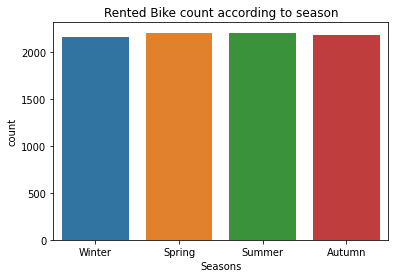

In [13]:
from seaborn.rcmod import palettes
sns.countplot(data['Seasons']).set_title('Rented Bike count according to season')

In [14]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'Count According to Holidays')

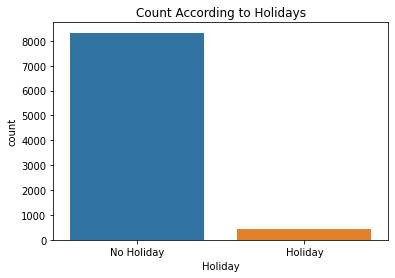

In [15]:
sns.countplot(data['Holiday']).set_title('Count According to Holidays')

Text(0.5, 1.0, 'Demand by Functioning day')

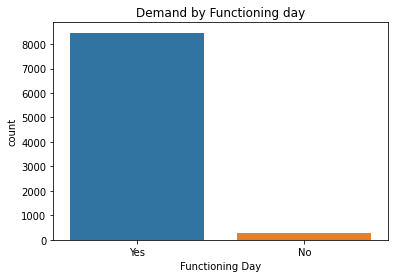

In [16]:
sns.countplot(data['Functioning Day']).set_title('Demand by Functioning day')

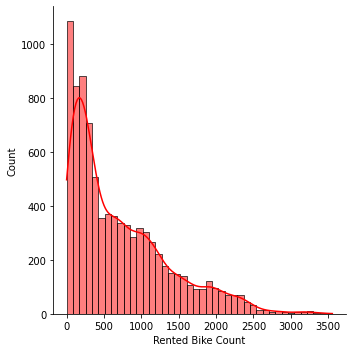

In [17]:
sns.displot(data['Rented Bike Count'],color="r",kde=True)

<Figure size 648x432 with 0 Axes>

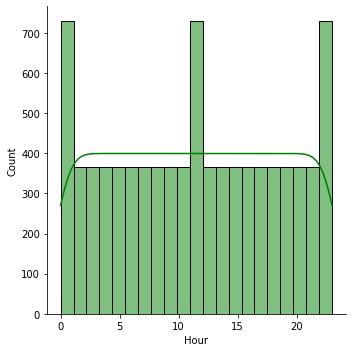

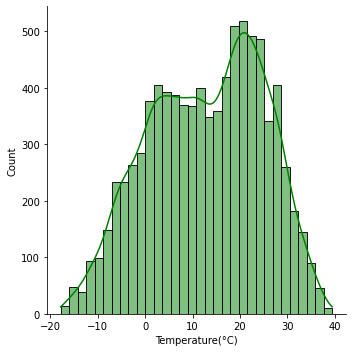

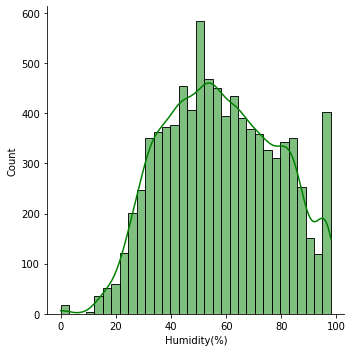

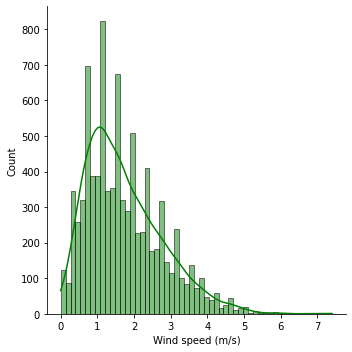

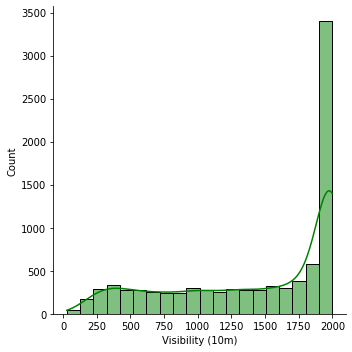

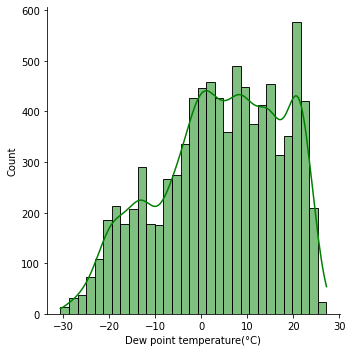

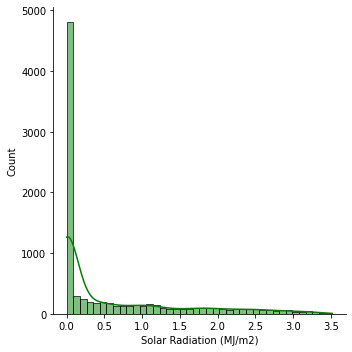

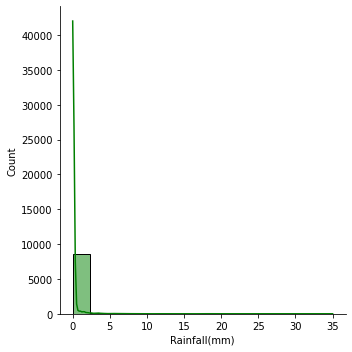

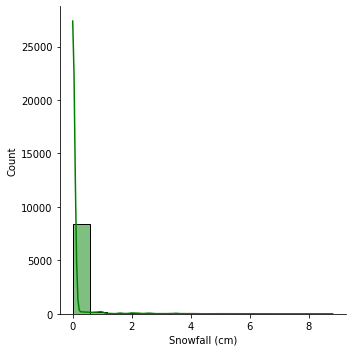

In [18]:
plt.figure(figsize=(9,6))
lis=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)',
     'Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)'
     ,'Rainfall(mm)','Snowfall (cm)']
for i in lis:
  sns.displot(data[i],kde=True,color='g')

In [19]:
data['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

## **Basic Conclusion from Univariate** **Analysis**




*   Booking are mostly similer throughout the seasons.
*   more booking on non holydays and functioning days.


*   not much information at hour.
*   the temprature is mostly grater than zero and let us consider as compare to cold the warm side is more.

*   Wind speed is not extreme.

*   Most of rainfall is less than 4 mm.

*   Snowfall is mostly 0-1 cm and not extreme in most of the cases
 

*   
*   List item















### **Exploring** **Numerical** **Variables**

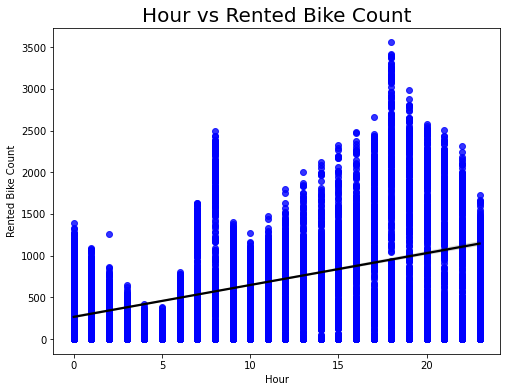

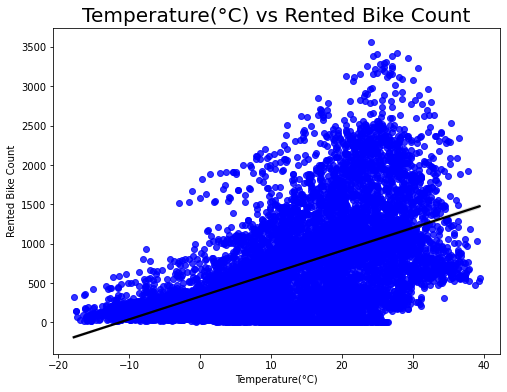

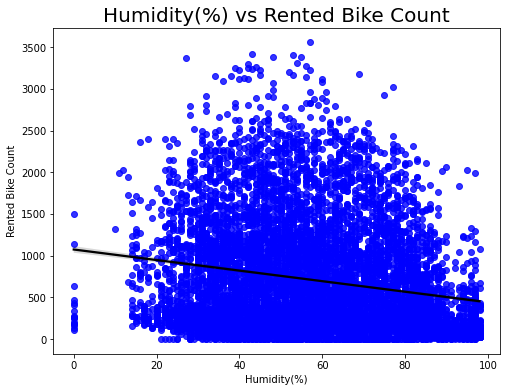

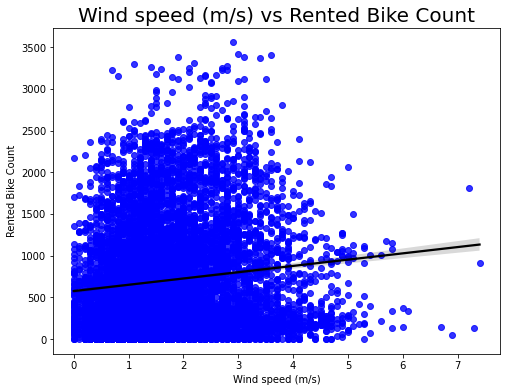

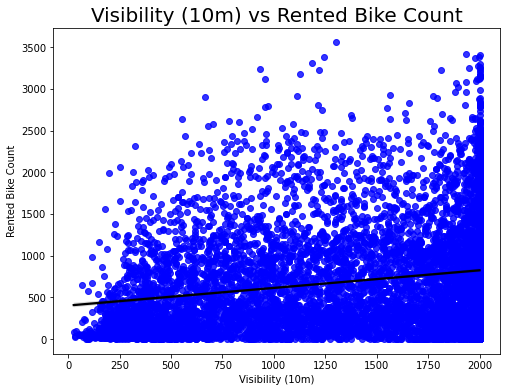

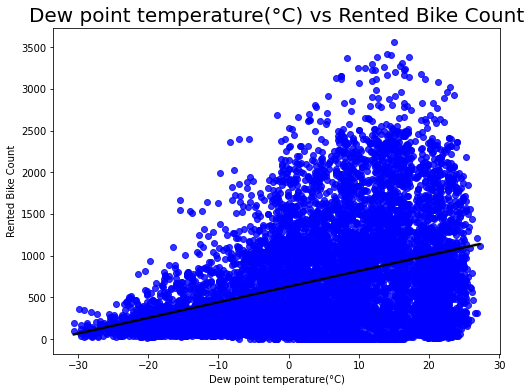

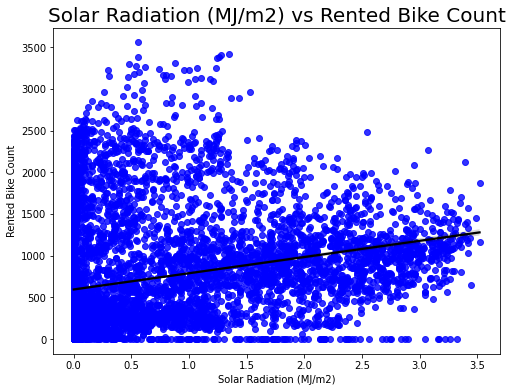

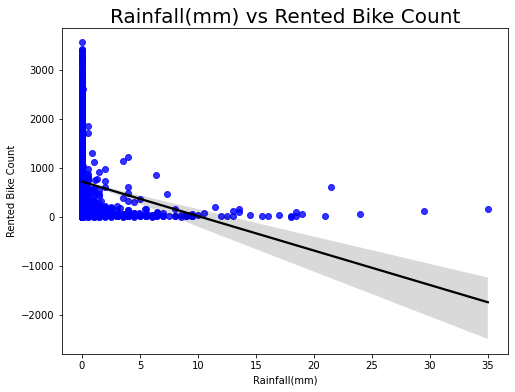

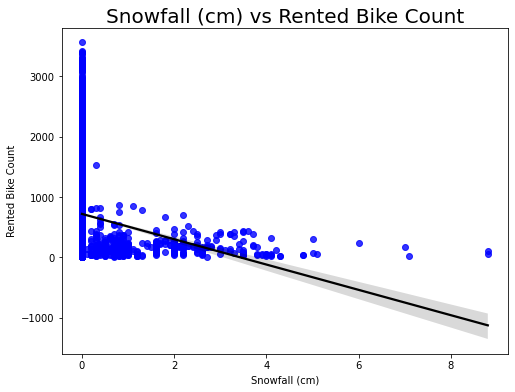

In [20]:
for col in lis:
  fig,ax=plt.subplots(figsize=(8,6))
  sns.regplot(x=data[col],y=data['Rented Bike Count'],scatter_kws={"color": 'Blue'}, line_kws={"color": "black"})
  plt.title(col+' vs '+ 'Rented Bike Count', fontsize=20)

Hour: Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

Temperature : Temperature is positively correlated. Rented bike count is highest between 20 °C and 30 °C. So, it means temperature has an effect.

Humidity : Humidity is the amount of water vapor in the air. So, People preferring to borrow bike When there is less humidity.

Wind_speed : wind speed doesn't affect our data much.

Visibility: Visibility doesn't affect our results much but all we know is that it is positively correlated with bike count.

SnowFall and Rainfall: People don't prefer borrowing bike, where there is rainfall or snowfall.

Dew point: The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity. It is positively correlated with data.

### Multivariate Analysis

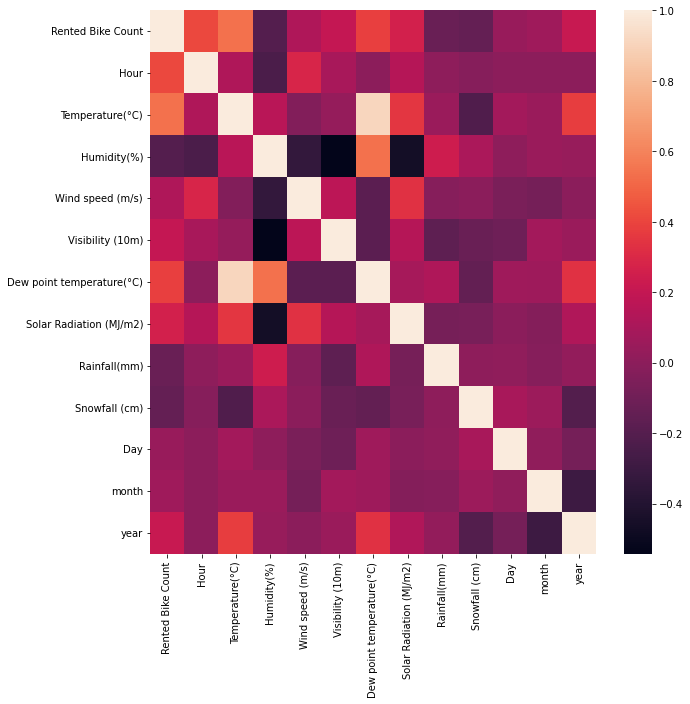

In [21]:
import seaborn as sns
plt.figure (figsize=(10,10))
sns.heatmap(data.corr())



*   Dew Point is highly corelated with Temerature , dropping Dew point



In [22]:
df=data.copy()

In [23]:
df=df.drop(columns=['Dew point temperature(°C)'],axis=1)

In [24]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


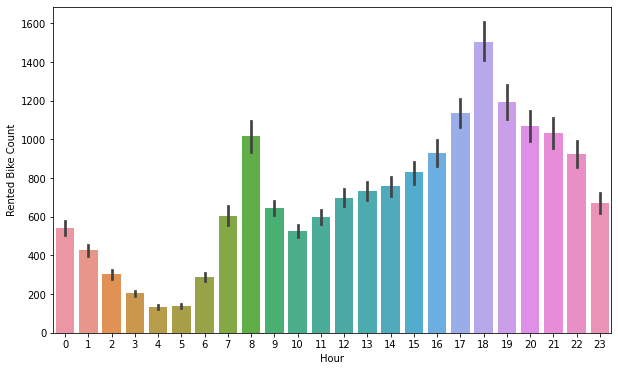

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

In [26]:
df=pd.get_dummies(df,columns = ['Seasons','Holiday','Functioning Day'])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1


In [65]:
# dropping the non-perfoming column
data.drop('month',axis=1,inplace=True)
data.drop('Date',axis=1,inplace=True)

## Model Building

In [66]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb


# indipendant and dependant data features


In [67]:
y = df['Rented Bike Count']
x =df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'month', 'year',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes']]

In [68]:
x

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1


In [69]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [71]:
X_train

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
1444,4,-11.1,50,1.2,1986,0.00,0.0,0.0,30,1,2018,0,0,0,1,0,1,0,1
1652,20,-5.8,44,2.1,1994,0.00,0.0,0.0,2,7,2018,0,0,0,1,0,1,0,1
7496,8,11.4,66,0.8,1991,0.18,0.0,0.0,10,9,2018,1,0,0,0,1,0,1,0
1893,21,-2.3,38,2.3,2000,0.00,0.0,0.0,17,2,2018,0,0,0,1,1,0,0,1
3880,16,19.1,54,3.2,542,0.94,0.0,0.0,5,11,2018,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22,29.9,74,2.0,1201,0.00,0.0,0.0,27,7,2018,0,0,1,0,0,1,0,1
5191,7,23.5,90,0.5,445,0.05,0.5,0.0,7,5,2018,0,0,1,0,0,1,0,1
5390,14,29.5,62,2.7,1941,1.79,0.0,0.0,13,7,2018,0,0,1,0,0,1,0,1
860,20,-3.4,51,1.1,1391,0.00,0.0,0.0,1,5,2018,0,0,0,1,0,1,0,1


In [72]:

#import train-test split lib
from sklearn.model_selection import train_test_split
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 19) (7008,)
(1752, 19) (1752,)


## Liner Regresion Model

In [34]:
#importing linear regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [35]:
# all coeffient
reg.score(X_train, y_train)

0.550589505190864

In [36]:
#diffrent coefficient for different features
reg.coef_


array([ 2.71270892e+01,  2.65541220e+01, -8.47880887e+00,  2.06812583e+01,
       -4.13772233e-03, -8.55052825e+01, -5.51471325e+01,  3.15868765e+01,
       -1.72721190e+00, -7.40132200e-01, -9.79113379e+01,  1.68362934e+02,
        3.66613473e+01,  2.93264005e+01, -2.34350681e+02, -5.99296026e+01,
        5.99296026e+01, -4.66359504e+02,  4.66359504e+02])

In [37]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [38]:
# mrtrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error((y_train),(y_pred_train))
print('MSE:',MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE: 184592.17753065634
RMSE : 429.64191779976073
R2 : 0.550589505190864
Adjusted R2 : 0.5456594824418031


In [61]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 195295.30810890516
RMSE : 441.9222874091158
R2 : 0.5529458125798287
Adjusted R2 : 0.5480416384684065


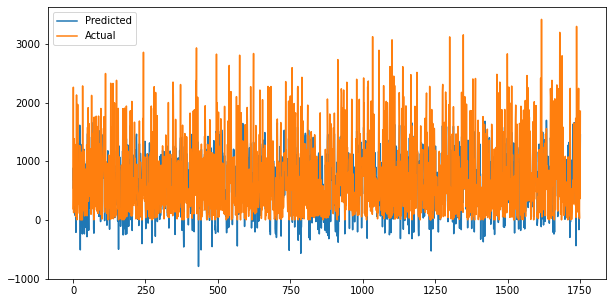

In [40]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

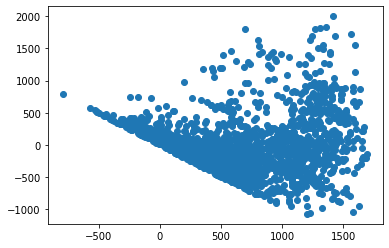

In [41]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

## Implementing Lasso Regression

In [47]:
# importng lasso model
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [48]:
lasso.score(X_train,y_train)

0.5505857930586274

In [49]:
# lasso y pred test and train 
y_pred_train_lasso = lasso.predict(X_train)
y_pred_train_lasso = lasso.predict(X_test)


In [62]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 195304.3774411607
RMSE : 441.93254851974945
R2 : 0.550589505190864
Adjusted R2 : 0.5456594824418031


# Implementing Ridge Regression

In [74]:
#importing ridge regression
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [75]:
# ridge score
ridge.score(X_train, y_train)

0.550589500216933

In [76]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [77]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 184592.1795736633
RMSE : 429.6419201773301
R2 : 0.550589500216933
Adjusted R2 : 0.5456594774133081


In [78]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 195295.48414787548
RMSE : 441.9224865831965
R2 : 0.5529454096056887
Adjusted R2 : 0.5480412310736495


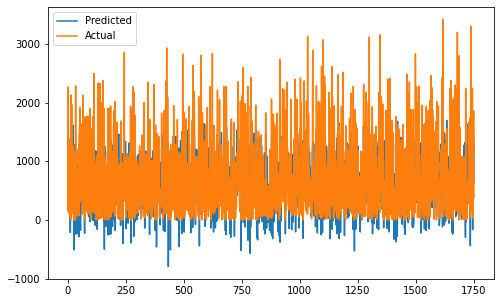

In [79]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

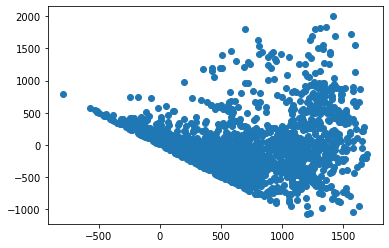

In [80]:
# Heteroscedasticity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

In [81]:
#importing elasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#a*l1+b*l2
#alpha=a+b and l1 ratio=a/a+b
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [82]:
#elastic net score

elasticnet.score(X_train, y_train)

0.534433626421434

In [83]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [84]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 191228.0903017565
RMSE : 437.29634151426023
R2 : 0.534433626421434
Adjusted R2 : 0.5293263740553873


In [85]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 202450.87353153632
RMSE : 449.9454117240627
R2 : 0.536565872290826
Adjusted R2 : 0.531482010612723


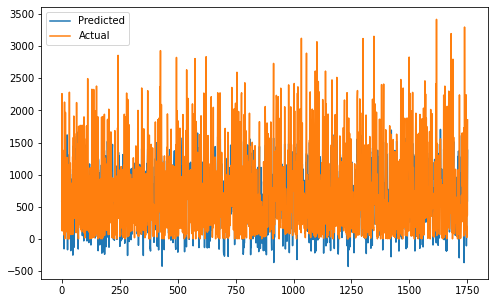

In [86]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

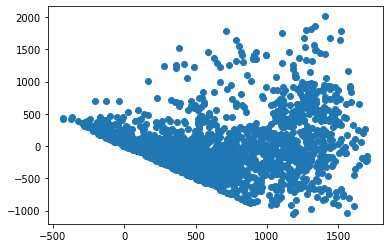

In [87]:
#Heteroscedasticity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

## Implementing of decision tree by using decision tree regressor

In [88]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [89]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [90]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7877783047803775
MSE : 87168.55812740809
RMSE : 295.24321859681737
R2 : 0.7877783047803775
Adjusted R2 : 0.7854502376850121


In [91]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 104051.88057705696
RMSE : 322.5707373229273
R2 : 0.7618128701024548
Adjusted R2 : 0.7591999627883362


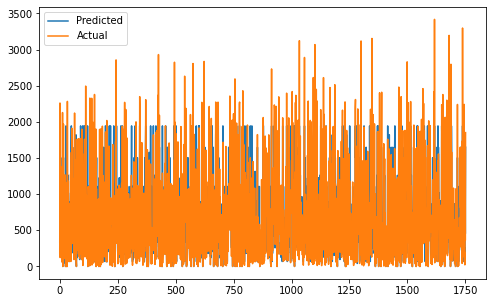

In [92]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


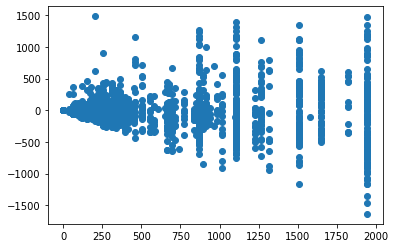

In [93]:
# Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))